# APPLIANCE ENERGY PREDICTION PROJECT PROJECT

##### Defining Parameters

<b>T1 =</b> Temperature in kitchen areas, in <b>Celsius</b>

<b>RH_1 =</b> Humidity in kitchen area, in <b>%</b>

<b>T2 =</b> Temperature in living room area, in <b>Celsius</b>

<b>RH_2 =</b> Humidity in living room area, in <b>%</b>

<b>T3 =</b> Temperature in laundry room area

<b>RH_3 =</b> Humidity in laundry room area, in <b>%</b>

<b>T4 =</b> Temperature in office room, in <b>%</b>

<b>RH_4 =</b> Humidity in office room, in <b>%</b>

<b>T5 =</b> Temperature in bathroom, in <b>Celsius</b>

<b>RH_5 =</b> Humidity in bathroom, in <b>%</b>

<b>T6 =</b> Temperature outside the building (north side), in <b>Celsius</b>

<b>RH_6 =</b> Humidity outside the building (north side), in <b>%</b>

<b>T7 =</b> Temperature in ironing room, in <b>Celsius</b>

<b>RH_7 =</b> Humidity in ironing room, in <b>%</b>

<b>T8 =</b> Temperature in teenager room 2, in <b>Celsius</b>

<b>RH_8 =</b> Humidity in teenager room 2, in <b>Celsius</b>

<b>T9 =</b> Temperature in parents room, in <b>%</b>

<b>RH_9 =</b> Humidity in parents room, in <b>%</b>

<b>To =</b> Temperature outside (from Chievres weather station), in <b>Celsius</b>

<b>Press_mm_hg =</b> Pressure (from Chievres weather station), in <b>mm Hg</b>

<b>RH_out =</b> Humidity outside (from Chievres weather station), in <b>%</b>

<b>Windspeed =</b> Windspeed (from Chievres weather station), in <b>m/s</b>

<b>Visibility =</b> Visibility (from Chievres weather station), in <b>m/s</b>

<b>Tdewpoint =</b> Tdewpoint (from Chievres weather station), <b>Â˚C</b>

<b>rv1 =</b> Random variable 1, <b>nondimensional</b>

<b>rv2 =</b> Random variable 2, <b>nondimensional</b>

##### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#####  Importing the dataset

In [2]:
df=pd.read_csv('energydata_complete.csv')

#####  Exploratory Data Analysis

In [3]:
df.head() #Checking the head of the data frame

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
#dropping the 'date' and 'lights' columns
df=df.drop(['date','lights'],axis=1)

Text(0.5, 1, 'Heat Map Showing the correlation of the features')

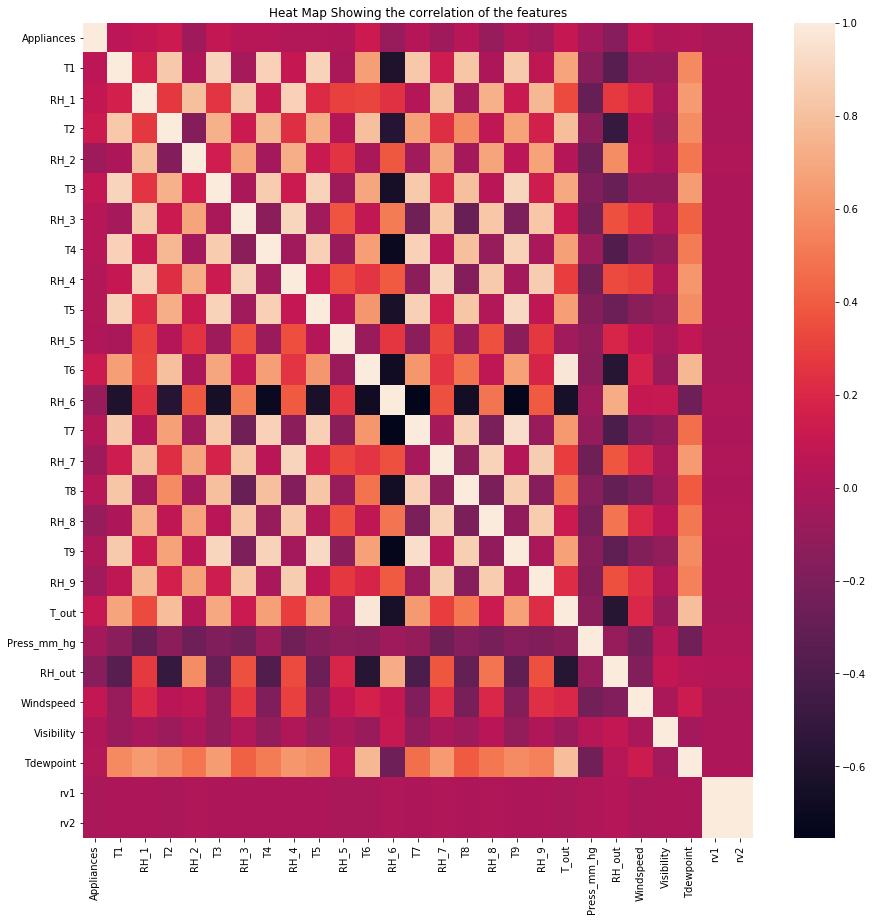

In [5]:
plt.figure(figsize=(15,15)) #Setting the figure size
sns.heatmap(df.corr()) #Using Seaborn to create the heat map
plt.title('Heat Map Showing the correlation of the features') #Setting the title of the plot

##### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler #Importing the required scaler
scaler=MinMaxScaler() #Instantiating the scaler
scaled_df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns) #Fitting and transforming the features to be scaled

In [7]:
scaled_df.head() #Checking the head of the data frame after scaling

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


##### Feature Selection

In [8]:
features_df=scaled_df.drop(['Appliances'],axis=1) #Selecting the independent features
target_df=scaled_df['Appliances'] #Selecting the dependent feature

##### Splitting the dataset

In [9]:
from sklearn.model_selection import train_test_split #Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.3, random_state=42)
#Selecting test size and random state

##### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression #Importing the linear regression
linear_model=LinearRegression() #Instantiating the model
linear_model.fit(X_train,y_train) #Fitting the model onto the training set
predicted_values=linear_model.predict(X_test) #Getting predictions off the test set

In [11]:
print(linear_model.intercept_) #Intercept
print(linear_model.coef_) #Coefficients

0.1529029588225294
[-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [12]:
coefficients=pd.DataFrame(linear_model.coef_,columns=['Coefficients'],index=features_df.columns)

In [13]:
print(coefficients)

             Coefficients
T1              -0.003281
RH_1             0.553547
T2              -0.236178
RH_2            -0.456698
T3               0.290627
RH_3             0.096048
T4               0.028981
RH_4             0.026386
T5              -0.015657
RH_5             0.016006
T6               0.236425
RH_6             0.038049
T7               0.010319
RH_7            -0.044614
T8               0.101995
RH_8            -0.157595
T9              -0.189941
RH_9            -0.039800
T_out           -0.321860
Press_mm_hg      0.006839
RH_out          -0.077671
Windspeed        0.029183
Visibility       0.012307
Tdewpoint        0.117758
rv1              0.000770
rv2              0.000770


In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

##### Mean Absolute Error

In [15]:
mae=mean_absolute_error(y_test,predicted_values)
round(mae,3)

0.05

##### Residual Sum of Squares

In [16]:
rss=np.sum(np.square(y_test,predicted_values))
round(rss,3)

92.984

##### Root Mean Squared Error

In [17]:
rmse=np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.085

##### R Squared

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score=r2_score(y_test,predicted_values)
round(r2_score,3)

0.205

In [20]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.4)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

##### Comparing Effects of Regularisation

In [22]:
def get_weights_df(model,feat,col_name):
    weights=pd.Series(model.coef_,feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns=['Features',col_name]
    weights_df[col_name].round(3)
    return weights_df

In [23]:
linear_model_weights=get_weights_df(linear_model,X_train,'Linear_Model_Weight')
ridge_weights_df=get_weights_df(ridge_reg,X_train,'Ridge_Weight')
lasso_weights_df=get_weights_df(lasso_reg,X_train,'Lasso_weight')

In [24]:
final_weights=pd.merge(linear_model_weights,ridge_weights_df,on='Features')
final_weights=pd.merge(final_weights,lasso_weights_df,on='Features')

In [25]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


In [26]:
ridge_pred=ridge_reg.predict(X_test)

In [27]:
rmse=np.sqrt(mean_squared_error(y_test,ridge_pred))
round(rmse,3)

0.088

In [28]:
lasso_pred=lasso_reg.predict(X_test)

In [29]:
rmse=np.sqrt(mean_squared_error(y_test,lasso_pred))
round(rmse,3)

0.094